In [7]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams["font.size"] = 18

# Application of the Diffusion Equations

This notebook is focused on application of the neutron diffusion equations for one group and multiple energy groups. 

## Learning Objectives

- Recall the one group diffusion equation
- Apply the one group diffusion equation to a slab problem

## Recall: The One Group Diffusion Equation

Consider a reactor that is:

- fast
- critical
- the fuel and coolant are a homogeneous mixture
- the reactor has only one region, no reflector ("bare" reactor)

This reactor can be described by the one group diffusion equation:

\begin{align}
D\nabla^2\phi-\Sigma_a\phi + s &= \frac{1}{v}\frac{\partial \phi}{\partial t}\\
D &= \mbox{ the diffusion coefficient}\\
\phi &= \mbox{ flux}\\
v &= \mbox{ neutron speed}
\end{align}

If the neutron source, $s$ does not balance neutron absorption and leakage, then the right hand side of the one-group diffusion equation is nonzero and the power may increase or decrease with time.


For time independent problems, $\frac{1}{v}\frac{\partial \phi}{\partial t} = 0$, so the steady state equation is:

\begin{align}
D\nabla^2\phi-\Sigma_a\phi + s &= 0\\
\end{align}

We can additionally simplify this by defining a new parameter:

\begin{align}
L^2 &= \frac{D}{\Sigma_a}\\
&= \mbox{diffusion area}
\end{align}

Such that: 

\begin{align}
&\nabla^2\phi-\frac{1}{L^2}\phi + \frac{s}{D} = 0\\
\implies & \nabla^2\phi-\frac{1}{L^2}\phi = -\frac{s}{D}
\end{align}




## Recall: Transport Cross Section

Recall that D is given approximately as :

\begin{align}
D &= \frac{1}{3\Sigma_{tr}}
\end{align}

where

\begin{align}
\Sigma_{tr} = \mbox{the macroscopic transport cross section}
\end{align}

This can also be stated:

\begin{align}
D &= \frac{\lambda_{tr}}{3}
\end{align}

where

\begin{align}
\lambda_{tr} = \mbox{the transport mean free path}
\end{align}


**In a purely scattering (no absorption) medium,** we can describe the transport mean free path thus:

\begin{align}
\lambda_{tr} &= \frac{1}{\Sigma_{tr}}\\
&= \frac{1}{\Sigma_s\left(1-\overline{\mu}\right)}
\end{align}


**In a medium with both absorption and scattering,** the transport mean free path is:

\begin{align}
\lambda_{tr} &= \frac{1}{\Sigma_{tr}}\\
&= \frac{1}{\left(\Sigma_t-\overline{\mu}\Sigma_s\right)}
\end{align}


## Planar source

Assume an infinite, planar, neutron source (with strength $S$) in an infinite diffusive medium. 
The flux is approximately a function of only x, so we can write the diffusion equation in 1D :

\begin{align}
\frac{d^2}{dx^2}\phi(x)-\frac{1}{L^2}\phi(x) = -\frac{s}{D}
\end{align}

How would you describe s(x)?





![https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png)



Everywhere except x=0:

\begin{align}
\frac{d^2\phi(x)}{dx^2}-\frac{\phi(x)}{L^2}= 0\\
\end{align}

This solution has the form:

\begin{align}
\phi(x) &= Ae^{x/L} + Ce^{-x/L}
\end{align}


The flux must go to zero at $\infty$.
What do we learn from this?


![https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png)



If $\phi(\infty)\rightarrow 0$, A must be equal to zero. 


The only physically acceptable solution for $x > 0$ is then

\begin{align}
\phi(x) =  Ce^{-x/L}
\end{align}

We need to find C using the source condition as $x\rightarrow0$.

If $S$ is the source strength per unit area of the plane, then the number of neutrons crossing outwards per unit area in the positive x-direction must tend to $S/2$ as $x \rightarrow 0$.

\begin{align}
&\lim_{x->0} J(x) = \frac{S}{2}\\
\implies &\lim_{x->0} \left( -D \frac{d\phi}{dx}\right)= \frac{S}{2}\\
\implies &\lim_{x->0} \left( \frac{CD}{L} e^{-x/L}\right)= \frac{S}{2}\\
\implies & \frac{CD}{L} = \frac{S}{2}\\
\implies & C = \frac{SL}{2D}\\
\end{align}


\begin{align}
\phi(x) =  \frac{SL}{2D}e^{-x/L}
\end{align}

## Extrapolation Distance

Let's do a [gedanken experiment](https://en.wikipedia.org/wiki/Thought_experiment):

- There is a slab in a vacuum 
- There is a source of neutrons in the medium
- The medium is diffusive

Are there any neutrons outside the slab?



![https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png)



![https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-3-319-42964-9_3/MediaObjects/340721_1_En_3_Fig14_HTML.gif](https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-3-319-42964-9_3/MediaObjects/340721_1_En_3_Fig14_HTML.gif)

k-effective =  [ 1.00031031]


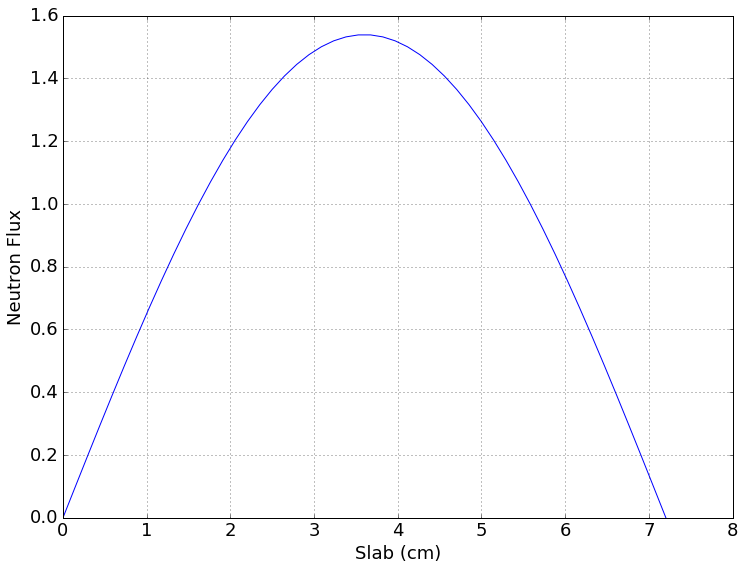

In [5]:
## This code example was adapted from
## https://github.com/marort91/AlphaEigenvalue/blob/master/RadiationTransportCoding/NeutronDiffusion_Python/NDE_CriticalityEigenvalue.ipynb

def diff(sig_tr):
    return 1.0/(3.0*sig_tr)

def sig_tr(e):
    sig_t(e) - mu*sig_s(e)

D = diff(0.1)
nusigf = 0.70
siga = 0.066    

Lx = np.pi*((nusigf-siga)/D)**(-0.5)

N = 50;
h = Lx/(N-1)

x = np.zeros(N)

for i in range(N-1):
    x[i+1] = x[i] + h
    
    
L = np.zeros((N,N))
A = np.zeros((N,N))
M = np.zeros((N,N))

for i in range(N):
    L[i][i] = L[i][i] + (-2*(-D/(h**2)))
    
for i in range(1,N):
    L[i][i-1] = L[i][i-1] + (-D/h**2)
    
for i in range(N-1):
    L[i][i+1] = L[i][i+1] + (-D/h**2)
    
for i in range(N):
    A[i][i] = A[i][i] + siga
    
M = L + A

M[0][0] = 1
M[0][1] = 0
M[N-1][N-1] = 1
M[N-1][N-2] = 0

phi0 = np.ones((N,1))
phi0[0] = 0
phi0[N-1] = 0

tol = 1e-15
k = 1.00


def is_converged(k_old, k, tol):
    return np.abs(k - k_old) <= tol

for i in range(100):
    # update k
    k_old = k
    # solve for psi
    psi = np.linalg.solve(M, nusigf*phi0)
    
    # solve for k
    k = sum(nusigf*psi)/sum(nusigf*phi0)
    
    # solve for phi
    phi0 = (1/k)*psi
    phi0[0] = 0
    phi0[N-1] = 0
    
    # determine convergence
    if is_converged(k_old, k, tol):
        break
        
plt.plot(x, phi0)
plt.xlabel('Slab (cm)')
plt.ylabel('Neutron Flux')
plt.grid()

print("k-effective = ", k)


## Slab

Let's approach solving this equation for a slab in a vacuum. The slab is composed of a diffusing medium with diffusion coeffcient $D$. 

- We want a solution for $\phi$
- We know the diffusion coefficient
- We have a differential equation



\begin{align}
\frac{d^2}{dx^2}\phi(x)-\frac{1}{L^2}\phi(x) = -\frac{s}{D}
\end{align}

#### Question: What else do we need?

![https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png)



We need:

- Boundary Conditions (for a 1-D problem, we need two BCs)
- A description of s(x)

Let's imagine there is an infinite planar source at the center of the slab.

![slab-lamarsh.png](./slab-lamarsh.png)

### Vacuum Boundary Condition

If we assume no neutrons are reflected back into the vacuum at the ordinary boundary $J_x(x = a) = 0$, then the derivative of $\phi$ at that boundary indicates that $\phi$ is flat across the boundary, as in the transport solution.

\begin{align}
J_x(x=a) = 0 \\
\implies & \left[ -D \frac{d\phi}{dx}\right]_{x=a} = 0\\
\implies & \left[ \frac{-\lambda_{tr}}{3}\frac{d\phi}{dx}\right]_{x=a} = 0\\
\implies & \left[\frac{d\phi}{dx}\right]_{x=a} = 0\\
\end{align}


![https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-3-319-42964-9_3/MediaObjects/340721_1_En_3_Fig14_HTML.gif](https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-3-319-42964-9_3/MediaObjects/340721_1_En_3_Fig14_HTML.gif)


The best way to approximate this with diffusion is through the extrapolated distance. Fick's law can be slightly corrected by assuming the flux diminishes to zero not at the real boundary ($x=a$), but, rather, at the extrapolated boundary ($x=\tilde{a}=a+d$) where $d=0.71\lambda_{tr}$.

Recall, the solution for the flux still has the form:

\begin{align}
\phi(x) &= Ae^{x/L} + Ce^{-x/L}
\end{align}

Thus:

\begin{align}
&\phi(x=\tilde{a}) = \phi(x=-\tilde{a}) =0 \\
\implies & \left[Ae^{x/L} + Ce^{-x/L}\right]_{x=\pm\tilde{a}} = 0\\
\end{align}

For the right hand side of the slab:

\begin{align}
\implies & \left[Ae^{x/L} + Ce^{-x/L}\right]_{x=\tilde{a}} = 0\\
\implies & C = -Ae^{-2\tilde{a}/L}\\
\end{align}

Accordingly:

\begin{align}
\phi(x) &= Ae^{x/L} -Ae^{-2\tilde{a}/L}e^{-x/L}\\
&=A\left[e^{x/L} - e^{(x -2\tilde{a})/L}\right]\\
\end{align}


### Question: What do we need to find the constant A?

![https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png)


We need a new boundary condition. Let's use the finite source condition, as before, such that, if $S$ is the source strength per unit area of the plane, then the number of neutrons crossing outwards per unit area in the positive x-direction must tend to $S/2$ as $x \rightarrow 0$.

\begin{align}
&\lim_{x->0} J(x) = \frac{S}{2}\\
\implies &\lim_{x->0} \left(-D \frac{d\phi}{dx}\right)= \frac{S}{2}\\
\implies &\lim_{x->0} \left(-D \frac{d}{dx} A\left[e^{x/L} - e^{(x -2\tilde{a})/L}\right]\right)= \frac{S}{2}\\
\implies & A = \frac{SL}{2D\left(1 + e^{-2\tilde{a}/L}\right)}\\
\end{align}

We can plug this solution for A, then:


\begin{align}
\phi(x)\big|_{x>0}&=A\left[e^{x/L} - e^{(x -2\tilde{a})/L}\right]\\
 &=\frac{SL}{2D\left(1 + e^{-2\tilde{a}/L}\right)}\left[e^{x/L} - e^{(x -2\tilde{a})/L}\right]\\
 &=\frac{SL}{2D}\frac{e^{-x/L} - e^{(x - 2\tilde{a})/L}}{1 + e^{-2\tilde{a}/L}}
\end{align}

The above solution is only applicable to the right hand side of $x=0$. To generalize, using symmetry, we substitute $|x|$ for $x$:

\begin{align}
\phi(x)&=\frac{SL}{2D}\frac{e^{-|x|/L} - e^{(|x| - 2\tilde{a})/L}}{1 + e^{-2\tilde{a}/L}}\\
\end{align}


It turns out one can write an equivalent expression with sinh and cosh:

\begin{align}
\phi(x)&=\frac{SL}{2D}\frac{\sinh{\left[(\tilde{a} - |x|)/L\right]}}{\cosh{\left[\tilde{a}/L\right]}}\\
\end{align}



From nuclear-power.net:

![https://www.nuclear-power.net/wp-content/uploads/2016/08/Solutions-of-the-Diffusion-Equation-Non-multiplying-Systems-min.png](https://www.nuclear-power.net/wp-content/uploads/2016/08/Solutions-of-the-Diffusion-Equation-Non-multiplying-Systems-min.png)


# Steady State 2D Multi-Group 

Steady-state 2D multi-group neutron diffusion equation

\begin{align}
\nabla\cdot J_g(x,y) &+\Sigma_{r,g}(x,y)\phi_g(x,y) = S_g(x,y)
\end{align}
where

\begin{align}J_g(x,y) &= -D_g(x,y)\nabla\phi_g(x, y)\\
\Sigma_{r,g}(x,y) &= \Sigma_{a,g}(x,y) + \sum_{g'\ne g}\Sigma_{s,g\rightarrow g'}(x,y)\\
S_g(x,y) &= \frac{\chi_g(x,y)}{k}\sum_{g'}\nu\Sigma_{f,g'}\phi_{g'}(x,y) + \sum_{g'\ne g}\Sigma_{s,g'\rightarrow g}(x,y)\phi_{g'}\\
D_g(x,y) &= \frac{1}{3\Sigma_{tr,g}(x,y)}
\end{align}


### Nomenclature

#### Subscripts

 \begin{align}
  g &= \mbox{energy group (discrete energy interval)}
 \end{align}
 
#### Variables

 \begin{align}
  \phi_g(x,y) &= \mbox{neutron flux}\\
  J_g(x,y) &= \mbox{neutron current (or neutron current density)}
  \end{align}

#### Coefficients (cross-sections, material properties)

 \begin{align}
\Sigma_{r,g}(x,y) &= \mbox{removal cross-section, sum of absorption and out-scattering (scattering from group g to group g’)}\\
D{g}(x,y) &= \mbox{diffusion coefficient (analogous to conductivity in heat conduction)}\\
\Sigma_{a,g}(x,y)&= \mbox{absorption cross-section}\\
\Sigma_{s,g\rightarrow g'}(x,y)&= \mbox{scattering cross-section from group g to group g’}\\
\Sigma_{tr,g}(x,y)&= \mbox{transport cross-sections, approximately equivalent to total cross-section}\\
&\mbox{(sum of absorption, out-scattering and self-scattering) corrected by transport effect}\\
\nu\Sigma_{f,g}(x,y)&= \mbox{fission cross-section multiplied by number of neutrons per fission}\\
\chi_{g}(x,y)&= \mbox{fission spectrum, fraction of all fission neutrons born in group g}\\
\end{align}


In both cases, $\overline{\mu}$ is the average cosine of the neutron scattering angle in the medium.

![http://farside.ph.utexas.edu/teaching/336k/Newtonhtml/img1021.png](http://farside.ph.utexas.edu/teaching/336k/Newtonhtml/img1021.png)

Without repeating our discussion of elastic scattering angles, note that the cosine of the neutron deflection from a nucleus of mass A is isotropic in the COM system, but **forward scattering is preferred in the laboratory frame of reference.**

\begin{align}
<\cos{\theta}> &= \frac{1}{n}\int_0^\pi \frac{n}{2}\cos{\theta}\sin{\theta}d\theta = 0
\end{align}

We arrive at the **average cosine of the scattering angle** by integrating over all angles $\theta \in [0, \pi]$ and normalizing by degree of anisotropy in COM system (from above, we arrive at n=2). 

\begin{align}
\overline{\mu} &= <\cos{\psi}> \\
&= \frac{1}{n}\int_0^\pi \frac{A\cos{\theta} + 1}{\sqrt{A^2 + 2A\cos{\theta} + 1}}\sin{\theta}d\theta\\
&= \frac{1}{2}\int_0^\pi \frac{A\cos{\theta} + 1}{\sqrt{A^2 + 2A\cos{\theta} + 1}}\sin{\theta}d\theta\\ &= \frac{2}{3A}
\end{align}

So, basically, **the transport mean free path ($\lambda_{tr}$) is the average distance a neutron will move in its original direction after infinite number of scattering collisions.**

![https://www.nuclear-power.net/wp-content/uploads/2016/08/transport-mean-free-path-graphically.png](https://www.nuclear-power.net/wp-content/uploads/2016/08/transport-mean-free-path-graphically.png)

### Putting it all together

\begin{align}
D &= \frac{1}{3\Sigma_{tr}}\\
\mbox{Purely scattering medium:   } &\\
D &= \frac{1}{3\Sigma_s\left(1-\frac{2}{3A}\right)}\\
\mbox{Scattering medium with absorption:   } &\\
D &= \frac{1}{3\left(\Sigma_t- \frac{2}{3A}\Sigma_s\right)}
\end{align}


## Starting with the Correct Equations

A key step in solving the multigroup equations seems obvious, but takes practice: _writing down the equations properly, based on the assumptions in the problem._

1. We begin with the general form of the multigroup equations
2. We write one equation per group.
3. Then, we delete terms that are zero.


### Begin with the General Form

\begin{align}
-D_g(x,y)\nabla^2\phi_g(x, y) &+\Sigma_{r,g}(x,y)\phi_g(x,y) = S_g(x,y)
\end{align}

Recall that the source in this form includes sources from scattering and sources from fission.

\begin{align}
S_g(x,y) = \sum_{g'\ne g}\Sigma_s^{g'\rightarrow g}\phi_{g'} + \chi_g\sum_{g'=1}^{g'=G}\nu_{g'}\Sigma_{f,g'}\phi_{g'}
\end{align}

### Four groups

Assume:

- four energy groups,
- no upscattering,
- fissions take place in the last two groups only,
- fission neutrons appear in the first two groups only, 79% of them in the 1st group

Write the multigroup diffusion equations. 
We write one equation per group. 

\begin{align}
-D_1\nabla^2\phi_1 + \Sigma_{R1}\phi_1 &= 0.79\left[(\nu\Sigma_f)_3\phi_3 + (\nu\Sigma_f)_4\phi_4\right] = 0.79S\\
-D_2\nabla^2\phi_2 + \Sigma_{R2}\phi_2 &= \Sigma_s^{1\rightarrow 2}\phi_1 + 0.21\left[((\nu\Sigma_f)_3\phi_3 + (\nu\Sigma_f)_4\phi_4\right] = \Sigma_s^{1\rightarrow 2}\phi_1 + 0.21S\\
-D_3\nabla^2\phi_3 + \Sigma_{R3}\phi_3 &=  \Sigma_s^{1\rightarrow 3}\phi_1 +  \Sigma_s^{2\rightarrow 3}\phi_2\\
-D_4\nabla^2\phi_4 + \Sigma_{R4}\phi_4 &=  \Sigma_s^{1\rightarrow 4}\phi_1 +  \Sigma_s^{2\rightarrow 4}\phi_2 +  \Sigma_s^{3\rightarrow 4}\phi_3
\end{align}     